### Name : Zarguit Abdennacer
### Matricule : 000336438
### Option : MSc in Electromechanical Engineering


# Project 2: Predictive modelling for a marketing campaign


## What is classification?

Classification involves deciding whether a sample is part of one class or another (**single-class classification**). If there are multiple class options, it's referred to as **multi-class classification**.


## What we'll end up with

In this project we'll look at the following topics.

* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model training** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics. 
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Feature importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
* **Reporting what we've found** - if we had to present our work, what would we show someone?

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

## 1. Problem Definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 
### Context
You are consultants hired to help a not-for-prot organization optimizing
their fund-raising eort. You are in charge of identifying the potential donors
to whom a letter should be sent to remind them of the eorts your orga-
nization is involved in (donors usually do not give \out of the blue" and
need such nudge to remember to donate). As such, you set out to produce
a predictive model to assess which of the past donors would be the most
likely to give this time around. Fortunately, this campaign has already been
tested on a part of the donors base and you already have some preliminary
results to work with.
You are giving a set of other previous donors and asked to identify which
of them are likely to donate as well as to give your recommendation of how
to operationalize the rest of the marketing campaign. Your client expects
a professional business-oriented result that retains the scientic rigour your
studies prepared you for. As such, you have the arduous tasks of presenting
your results in a compelling, actionable and precise way.
In a statement,

> Given personal parameters about a donor, can we predict whether or not they will donate?

## 2. Data

The data contains the following datasets:
1. A dataset containing some general information about the donor
2. A dataset containing the reference of the past campaigns to which the
donors have donated (unfortunately, the information about whether
on not the donor was contacted then was lost)
3. A dataset containing a set of some of the donors already approached
for this campaign and whether or not they donated
4. A dataset with the ID of donors that you are asked to label (i.e. to
tell whether or not they are likely to give to the campaign)

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are general information about the donor and the dependent variable is whether or not they will donate.



## Preparing the tools

At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.


The libraries we use will differ from project to project. But there are a few which will we'll likely take advantage of during almost every structured data project. 

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#from sklearn.metrics import plot_roc_curve
from scikitplot.metrics import plot_roc_curve
import matplotlib.pylab as pylab

import calendar
import matplotlib.patches as mpatches

from sklearn.preprocessing import OneHotEncoder

In [2]:
params = {'legend.fontsize': 10,
         'axes.labelsize': 14,
         'axes.titlesize':15,
         'xtick.labelsize':11,
         'ytick.labelsize':11}
pylab.rcParams.update(params)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

# Data understanding

The personal information that we possess is classified under the following headings :”donorID, zipcode, province, region, gender, language, dateOfBirth”. The goal is to find if there is any correlation between this information and the fact of being a donor in order to predict whom to target with advertising. There is only a few data missing so our best strategy is simply to remove those missing data.

## Load Data

Pandas has a built-in function to read `.csv` files called `read_csv()` which takes the file pathname of our `.csv` file. W'll likely use this a lot.

In [3]:
donors_info_df = pd.read_csv('selected_donors_info.csv')

In [4]:
donors_info_df.head(100)

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24
1,100002,2260.0,Antwerp,Flanders,M,NL,1952-01-14
2,100008,1780.0,Flemish Brabant,Flanders,M,NL,1937-08-30
3,100009,1020.0,Brussels,Brussels,M,NL,1932-01-20
4,100010,1020.0,Brussels,Brussels,M,NL,1983-05-30
...,...,...,...,...,...,...,...
95,100201,1200.0,Brussels,Brussels,M,FR,1961-07-27
96,100207,1315.0,Walloon Brabant,Wallonia,F,FR,1972-11-18
97,100208,1200.0,Brussels,Brussels,M,NL,1988-01-17
98,100211,1200.0,Brussels,Brussels,F,NL,1979-05-23


In [5]:
donors_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25645 entries, 0 to 25644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   donorID      25645 non-null  int64  
 1   zipcode      25644 non-null  float64
 2   province     25645 non-null  object 
 3   region       25645 non-null  object 
 4   gender       25645 non-null  object 
 5   language     25645 non-null  object 
 6   dateOfBirth  25645 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.4+ MB


In [6]:
donors_info_df.isnull().values.any()

True

In [7]:
donors_info_df.isnull().values.sum()

1

In [8]:
giving_history_df = pd.read_csv('giving_history.csv')

In [9]:
giving_history_df.head(100)

,donorID,campID,date
0,100001,0,1998-10-23
1,100001,1577,1999-08-18
2,100001,1634,1999-12-31
3,100001,1778,2000-10-19
4,100001,1808,2000-12-29
...,...,...,...
95,100058,1626,1999-11-15
96,100058,1663,2000-06-15
97,100058,1778,2000-10-19
98,100058,1878,2001-05-16


In [10]:
giving_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109077 entries, 0 to 109076
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   donorID  109077 non-null  int64 
 1   campID   109077 non-null  int64 
 2   date     109077 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


In [11]:
campaign_test_df = pd.read_csv('results_of_the_campaign_test.csv')

In [12]:
campaign_test_df.nunique()

potential_donors    12822
donated                 2
dtype: int64

In [13]:
campaign_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12822 entries, 0 to 12821
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   potential_donors  12822 non-null  int64
 1   donated           12822 non-null  int64
dtypes: int64(2)
memory usage: 200.5 KB


In [14]:
campaign_test_df.nunique()

potential_donors    12822
donated                 2
dtype: int64

In [15]:
donors_to_predict_df = pd.read_csv('donors_to_predict_for_students.csv')

In [16]:
donors_to_predict_df.head()

,potential_donors
0,138065
1,106492
2,122752
3,142834
4,127055


In [17]:
campaign_test_df = campaign_test_df.rename(columns={'potential_donors': "donorID"})

In [18]:
campaign_test_df

,donorID,donated
0,135639,0
1,123028,0
2,100494,0
3,101064,0
4,137907,0
...,...,...
12817,114782,0
12818,138110,0
12819,109956,0
12820,140673,0


In [19]:
donors_to_predict_df = donors_to_predict_df.rename(columns={'potential_donors': "donorID"})

In [20]:
donors_to_predict_df.head()

,donorID
0,138065
1,106492
2,122752
3,142834
4,127055


In [21]:
data_df = pd.merge(donors_info_df, campaign_test_df, on='donorID')

In [22]:
data_df.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth,donated
0,100010,1020.0,Brussels,Brussels,M,NL,1983-05-30,0
1,100011,1090.0,Brussels,Brussels,M,NL,1963-02-25,0
2,100012,1020.0,Brussels,Brussels,F,FR,1977-08-09,0
3,100018,1030.0,Brussels,Brussels,F,NL,1992-10-20,0
4,100021,1030.0,Brussels,Brussels,M,FR,1973-01-16,0


In [23]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12822 entries, 0 to 12821
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   donorID      12822 non-null  int64  
 1   zipcode      12821 non-null  float64
 2   province     12822 non-null  object 
 3   region       12822 non-null  object 
 4   gender       12822 non-null  object 
 5   language     12822 non-null  object 
 6   dateOfBirth  12822 non-null  object 
 7   donated      12822 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 901.5+ KB


In [24]:
data_df['zipcode'].isnull().sum()

1

In [25]:
data_df['zipcode'].fillna(data_df['zipcode'].mode()[0], inplace=True)

In [26]:
data_to_predict_df = pd.merge(donors_info_df, donors_to_predict_df, on='donorID')

In [27]:
data_to_predict_df.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24
1,100002,2260.0,Antwerp,Flanders,M,NL,1952-01-14
2,100008,1780.0,Flemish Brabant,Flanders,M,NL,1937-08-30
3,100009,1020.0,Brussels,Brussels,M,NL,1932-01-20
4,100019,1030.0,Brussels,Brussels,M,NL,1971-01-16


## Data Exploration (exploratory data analysis or EDA)

In [28]:
df = data_df

In [29]:
# Let's check the top 5 rows of our dataframe
df.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth,donated
0,100010,1020.0,Brussels,Brussels,M,NL,1983-05-30,0
1,100011,1090.0,Brussels,Brussels,M,NL,1963-02-25,0
2,100012,1020.0,Brussels,Brussels,F,FR,1977-08-09,0
3,100018,1030.0,Brussels,Brussels,F,NL,1992-10-20,0
4,100021,1030.0,Brussels,Brussels,M,FR,1973-01-16,0


In [30]:
# And the top 10
df.head(10)

,donorID,zipcode,province,region,gender,language,dateOfBirth,donated
0,100010,1020.0,Brussels,Brussels,M,NL,1983-05-30,0
1,100011,1090.0,Brussels,Brussels,M,NL,1963-02-25,0
2,100012,1020.0,Brussels,Brussels,F,FR,1977-08-09,0
3,100018,1030.0,Brussels,Brussels,F,NL,1992-10-20,0
4,100021,1030.0,Brussels,Brussels,M,FR,1973-01-16,0
5,100022,1030.0,Brussels,Brussels,M,FR,1954-01-25,0
6,100026,2500.0,Antwerp,Flanders,F,FR,1983-08-10,0
7,100029,3080.0,Flemish Brabant,Flanders,M,NL,1973-02-19,0
8,100031,1040.0,Brussels,Brussels,M,NL,1965-10-30,0
9,100034,1030.0,Brussels,Brussels,M,NL,1959-04-12,0


`value_counts()` allows you to show how many times each of the values of a **categorical** column appear.

In [31]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df.donated.value_counts()

0    12642
1      180
Name: donated, dtype: int64

Since these two values are far to be even, our `target(donated)` column can be considered **unbalanced**. An **unbalanced** target column, meaning some classes have far more samples, can be harder to model than a balanced set. We will see the impact of this problem and we will try deal with it later.


If you'd prefer these values in percentages, `value_counts()` takes a parameter, `normalize` which can be set to true.

In [32]:
# Normalized value counts
df.donated.value_counts(normalize=True)

0    0.985962
1    0.014038
Name: donated, dtype: float64

We can plot the target column value counts by calling the `plot()` function and telling it what kind of plot we'd like, in this case, bar is good.

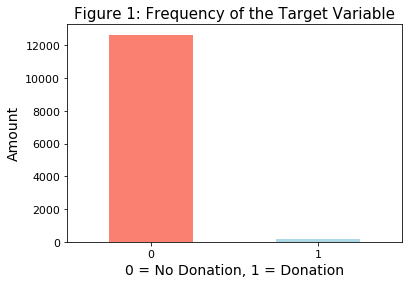

In [33]:
# Plot the value counts with a bar graph
df.donated.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.title("Figure 1: Frequency of the Target Variable")
plt.xlabel("0 = No Donation, 1 = Donation")
plt.ylabel("Amount")
#plt.legend()
plt.xticks(rotation=0); # keep the labels on the x-axis vertical


`df.info()` shows a quick insight to the number of missing values you have and what type of data your working with.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12822 entries, 0 to 12821
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   donorID      12822 non-null  int64  
 1   zipcode      12822 non-null  float64
 2   province     12822 non-null  object 
 3   region       12822 non-null  object 
 4   gender       12822 non-null  object 
 5   language     12822 non-null  object 
 6   dateOfBirth  12822 non-null  object 
 7   donated      12822 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 901.5+ KB


Another way to get some quick insights on our dataframe is to use `df.describe()`. `describe()` shows a range of different metrics about our numerical columns such as mean, max and standard deviation.

In [35]:
df.describe()

,donorID,zipcode,donated
count,12822.000000,12822.000000,12822.000000
mean,123876.194821,5422.940415,0.014038
std,12158.190340,3124.677938,0.117654
min,100010.000000,1000.000000,0.000000
25%,114379.250000,2610.000000,0.000000
50%,124775.500000,3740.000000,0.000000
75%,134094.750000,8800.000000,0.000000
max,144691.000000,9992.000000,1.000000


### Donation Frequency according to Gender

If you want to compare two columns to each other, you can use the function `pd.crosstab(column_1, column_2)`. 

This is helpful if you want to start gaining an intuition about how your independent variables interact with your dependent variables.

Let's compare our target column with the gender column. 

In [36]:
df.gender.value_counts()

M    7724
F    5098
Name: gender, dtype: int64

In [37]:
# Compare target column with sex column
pd.crosstab(df.donated, df.gender)

gender,F,M
donated,,
0,4987,7655
1,111,69


### Making our crosstab visual
You can plot the crosstab by using the `plot()` function and passing it a few parameters such as, `kind` (the type of plot you want), `figsize=(length, width)` (how big you want it to be) and `color=[colour_1, colour_2]` (the different colours you'd like to use).

Different metrics are represented best with different kinds of plots. In our case, a bar graph is great. We'll see examples of more later. And with a bit of practice, you'll gain an intuition of which plot to use with different variables.

We'll create the plot again with `crosstab()` and `plot()`, then add some helpful labels to it with `plt.title()`, `plt.xlabel()` and more.

To add the attributes, you call them on `plt` within the same cell as where you make create the graph.

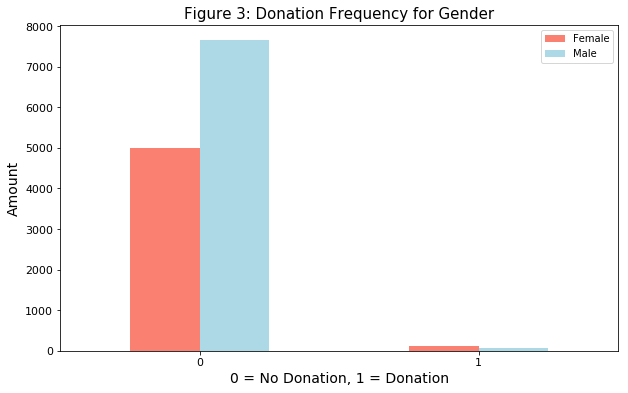

In [38]:
# Create a plot
pd.crosstab(df.donated, df.gender).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Add some attributes to it
plt.title("Figure 3: Donation Frequency for Gender")
plt.xlabel("0 = No Donation, 1 = Donation")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

What can we infer from this?


Let's check the age **distribution**.

In [39]:
from datetime import datetime
from datetime import date
def calculate_age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


In [40]:
df = data_df.copy()
df['age'] = df['dateOfBirth'].apply(calculate_age)
df.drop(["donorID", "dateOfBirth"], axis=1, inplace= True)
df.head()

,zipcode,province,region,gender,language,donated,age
0,1020.0,Brussels,Brussels,M,NL,0,37
1,1090.0,Brussels,Brussels,M,NL,0,57
2,1020.0,Brussels,Brussels,F,FR,0,42
3,1030.0,Brussels,Brussels,F,NL,0,27
4,1030.0,Brussels,Brussels,M,FR,0,47


Text(0,0.5,'Number of Donors')

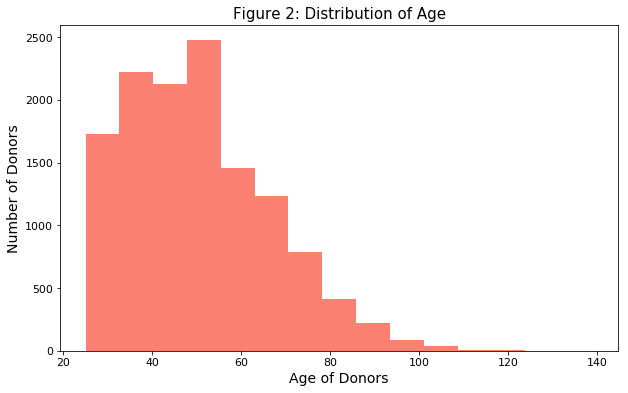

In [41]:
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist(figsize=(10,6), color='salmon', bins =15);
plt.title("Figure 2: Distribution of Age")
plt.xlabel("Age of Donors")
plt.ylabel("Number of Donors")


We can see it's a [**normal distribution**](https://en.wikipedia.org/wiki/Normal_distribution) but slightly swaying to the right, which reflects in the scatter plot above.

### Donation Frequency per Region
.

In [42]:
pd.crosstab(df.language, df.language)

language,FR,NL
language,,
FR,3141,0
NL,0,9681


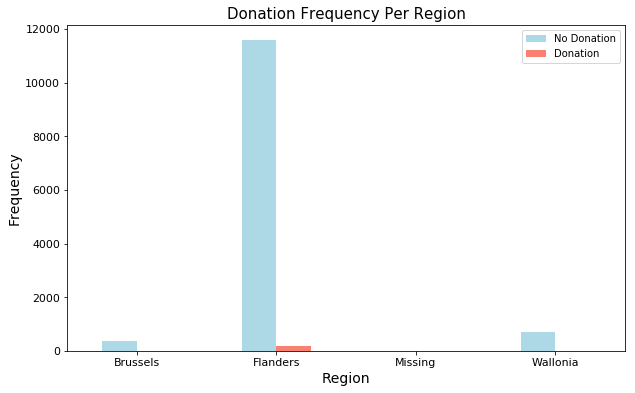

In [43]:
# Create a new crosstab and base plot
pd.crosstab(data_df.region, df.donated).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Donation Frequency Per Region")
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.legend(["No Donation", "Donation"])
#plt.xlabel("0 = No Donation, 1 = Donation")
plt.xticks(rotation = 0);

## Data Visualization
Here is a quick overview of the basic information we own about donors, the Figure 1. shows the small percentage of donations, 180 donors out of the 12822 potential donors which is equal to 1,4%. Figure 2. shows the age repartition of the donors. Figure 3. is a geographic representation, most people come from Flanders. As you can see in Figure 4. In our study, we have 7724 males and 5098 females. This last graph shows the donation frequency for each gender, where we have 111 females and 69 males who donate. 


### Enough EDA, let's model

We do exploratory data analysis (EDA) to start building an intuitition of the dataset.

What have we learned so far? Aside from our basline estimate using `sex`, the rest of the data seems to be pretty distributed.

So what we'll do next is **model driven EDA**, meaning, we'll use machine learning models to drive our next questions.

---

# Feature Engineering

## Data Encoding

Since the dataset contains some text data or dates it should be converted to numerical data, for instance DateofBirth is converted to age which is simpler to analyse and compare. Text data like names, provinces, regions or languages are converted into categorical data then converted into dummies variables. All these data are now easier to compare and manipulate to build a predictive model.  Since the name of donor and donor ID have no actual meaning it should be dropped.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12822 entries, 0 to 12821
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   zipcode   12822 non-null  float64
 1   province  12822 non-null  object 
 2   region    12822 non-null  object 
 3   gender    12822 non-null  object 
 4   language  12822 non-null  object 
 5   donated   12822 non-null  int64  
 6   age       12822 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 801.4+ KB


In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
df['gender'] = labelencoder_X.fit_transform(df['gender'])
df['language'] = labelencoder_X.fit_transform(df['language'])

#dum_df = pd.get_dummies(df, columns=["province"], prefix=["province"] )
df = pd.get_dummies(df, columns=['province', "region"], prefix=['province',"region"] )

In [46]:
df.head()

,zipcode,gender,language,donated,age,province_Antwerp,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,...,province_Limburg,province_Luxembourg,province_Missing,province_Namur,province_Walloon Brabant,province_West Flanders,region_Brussels,region_Flanders,region_Missing,region_Wallonia
0,1020.0,1,1,0,37,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1090.0,1,1,0,57,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1020.0,0,0,0,42,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1030.0,0,1,0,27,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1030.0,1,0,0,47,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12822 entries, 0 to 12821
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   zipcode                   12822 non-null  float64
 1   gender                    12822 non-null  int64  
 2   language                  12822 non-null  int64  
 3   donated                   12822 non-null  int64  
 4   age                       12822 non-null  int64  
 5   province_Antwerp          12822 non-null  uint8  
 6   province_Brussels         12822 non-null  uint8  
 7   province_East Flanders    12822 non-null  uint8  
 8   province_Flemish Brabant  12822 non-null  uint8  
 9   province_Hainaut          12822 non-null  uint8  
 10  province_Liege            12822 non-null  uint8  
 11  province_Limburg          12822 non-null  uint8  
 12  province_Luxembourg       12822 non-null  uint8  
 13  province_Missing          12822 non-null  uint8  
 14  provin

#  Modeling

## Splitting the data

We're trying to predict our target variable (donated) using all of the other variables. To do this, we will split the target variable from the rest. We use the training set to train our model and our test set to test it. It is important for the test set to remain separate from the training set so that the test set can mimic a real environment as much as possible. The model should not learn from the test set, but should only be evaluated on it. We used 80% of our data to train on and the other 20% to test on. From our test data we have 2565 examples we can test our model on and the rest will be used as our training data to train on.  At the end we have four categories named “X_train, X_test, y_train and y_test”, in this case the X represents the independent variables, also known as the features and the Y represents a dependent variable cald the target variable.
To build our model we choose 3 classifiers: k-nearest neighbors(KNN), logistic regression and random forest.


In [48]:
df.head()

,zipcode,gender,language,donated,age,province_Antwerp,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,...,province_Limburg,province_Luxembourg,province_Missing,province_Namur,province_Walloon Brabant,province_West Flanders,region_Brussels,region_Flanders,region_Missing,region_Wallonia
0,1020.0,1,1,0,37,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1090.0,1,1,0,57,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1020.0,0,0,0,42,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1030.0,0,1,0,27,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1030.0,1,0,0,47,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


We're trying to predict our target variable using all of the other variables.

To do this, we'll split the target variable from the rest.

In [49]:
# Everything except target variable
df.dropna(inplace=True)
X = df.drop("donated", axis=1)

# Target variable
y = df.donated.values

Let's see our new variables.

In [50]:
# Independent variables (no target column)
X.head()

,zipcode,gender,language,age,province_Antwerp,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Liege,province_Limburg,province_Luxembourg,province_Missing,province_Namur,province_Walloon Brabant,province_West Flanders,region_Brussels,region_Flanders,region_Missing,region_Wallonia
0,1020.0,1,1,37,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1090.0,1,1,57,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1020.0,0,0,42,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1030.0,0,1,27,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1030.0,1,0,47,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [51]:
# Targets
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
X.shape

(12822, 20)

In [53]:
X.columns

Index(['zipcode', 'gender', 'language', 'age', 'province_Antwerp',
       'province_Brussels', 'province_East Flanders',
       'province_Flemish Brabant', 'province_Hainaut', 'province_Liege',
       'province_Limburg', 'province_Luxembourg', 'province_Missing',
       'province_Namur', 'province_Walloon Brabant', 'province_West Flanders',
       'region_Brussels', 'region_Flanders', 'region_Missing',
       'region_Wallonia'],
      dtype='object')

In [54]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

The `test_size` parameter is used to tell the `train_test_split()` function how much of our data we want in the test set.

A rule of thumb is to use 80% of your data to train on and the other 20% to test on. 

For our problem, a train and test set are enough. But for other problems.

But again, each problem will differ. The post, [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/) by Rachel Thomas is a good place to go to learn more.

In [55]:
X_train.head()

,zipcode,gender,language,age,province_Antwerp,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Liege,province_Limburg,province_Luxembourg,province_Missing,province_Namur,province_Walloon Brabant,province_West Flanders,region_Brussels,region_Flanders,region_Missing,region_Wallonia
777,3470.0,0,0,50,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
11662,2328.0,0,1,47,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2347,9660.0,1,1,41,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
12288,2100.0,1,1,34,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1194,9000.0,1,1,46,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [56]:
y_train, len(y_train)

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64), 10257)

In [57]:
X_test.head()

,zipcode,gender,language,age,province_Antwerp,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Liege,province_Limburg,province_Luxembourg,province_Missing,province_Namur,province_Walloon Brabant,province_West Flanders,region_Brussels,region_Flanders,region_Missing,region_Wallonia
7386,1820.0,1,1,48,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9517,1730.0,1,0,90,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3037,1780.0,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3026,1500.0,1,1,55,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2692,2040.0,1,1,55,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
y_test, len(y_test)

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64), 2565)

### Model choices

Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

1. Logistic Regression - [`LogisticRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [`KNeighboursClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [59]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

## Accuracy of the model
Accuracy is the ratio of number of correct predictions on the total number of input samples.

In [60]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.9859649122807017,
 'Logistic Regression': 0.9859649122807017,
 'Random Forest': 0.9801169590643275}

In [61]:
# Setup random seed
np.random.seed(42)

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 500, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 10, 2),
           "min_samples_leaf": np.arange(1, 10, 2)}

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=10,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);
y_preds = rs_rf.predict(X_test)
print(confusion_matrix(y_test, y_preds))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   49.0s finished


[[2529    0]
 [  36    0]]


## Accuracy of the model
Accuracy is the ratio of number of correct predictions on the total number of input samples.

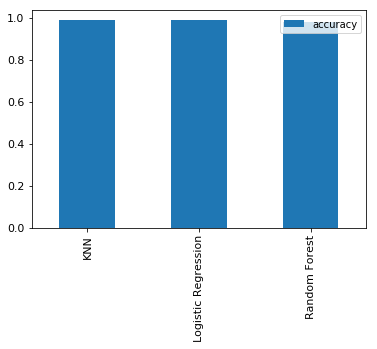

In [62]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

### Confusion matrix 

A confusion matrix is a visual way to show where our model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and passing it the true labels and predicted labels

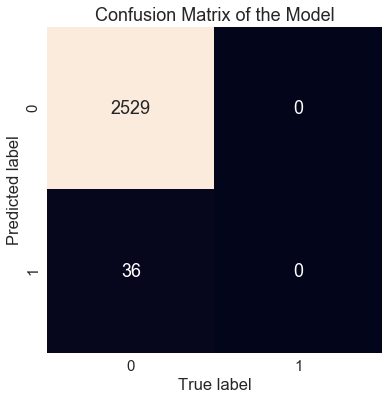

In [63]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False,
                     fmt='g'
                    )
    plt.title('Confusion Matrix of the Model')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.savefig('confusion_matrix')
    
    
plot_conf_mat(y_test, y_preds)

## Conclusion

From the confusion matrix shown above, we can see that our model does not perform well even we have high accuracy since the  majority of cases belong to one class and this is because our dataset is unbalanced
We can also notice that both Precision and Recall(sensitivity) are zero. 

# Challenge of unbalanced data set 

Figure 1 (frequency of the target variable) shows that the dataset is imbalanced which means that the majority of data items in our dataset represents items belonging to one class, (in our case the number of non-donor), we say the dataset is skewed or imbalanced. Since it is an imbalanced dataset we will have to make some modifications, we have chosen to resample the dataset by over-sampling the number of donors but we could have done it by under-sampling the non-donors. Under sampling involves removing samples from the majority class and over-sampling involves adding more examples into the minority class.
Why does it matter if the dataset is skewed? When the dataset does not represent all classes of data equally, the model might overfit to the class that’s represented more in the dataset and become oblivious to the existence of the minority class. It might even give us good accuracy but fail miserably in real life.

Ref: https://towardsdatascience.com/what-to-do-when-your-classification-dataset-is-imbalanced-6af031b12a36

In [64]:
#Module for resamplingPython
from sklearn.utils import resample


# Separate majority and minority classes
df_majority = df[df.donated==0]
df_minority = df[df.donated==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority)-1,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.donated.value_counts()

0    12642
1    12641
Name: donated, dtype: int64

In [65]:
X = df_upsampled.drop("donated", axis=1)

# Target variable
y = df_upsampled.donated.values

In [66]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [67]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [68]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.9719201107375914,
 'Logistic Regression': 0.6408938105596204,
 'Random Forest': 0.9942653747280996}

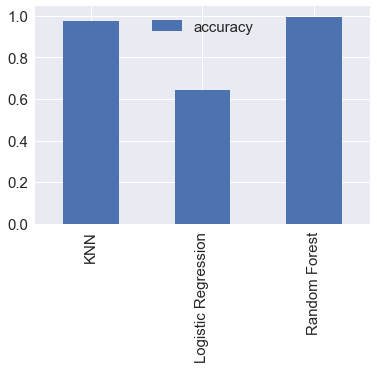

In [69]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();
plt.savefig('accuracy')


We can see that Random forest has high performance. 
Let's see if we can tuning it further using Cross-validation

In [70]:
# Setup random seed
np.random.seed(42)

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 500, 50),
           "max_depth": [None, 3, 5],
           "min_samples_split": np.arange(2, 10, 2),
           "min_samples_leaf": np.arange(1, 10, 2)}

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=10,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.8min finished


In [71]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': None}

In [72]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)
# Make preidctions on test data
y_preds = rs_rf.predict(X_test)

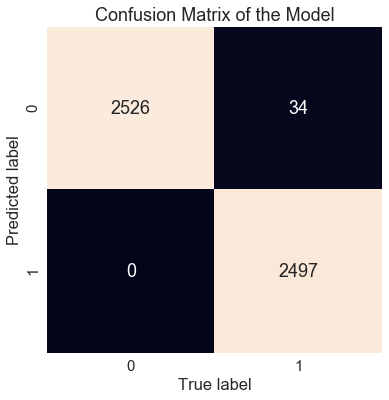

In [73]:
plot_conf_mat(y_test, y_preds)

True positives (TP) bottom right : 2476 , these are cases in which the model predicted yes (they  donate), and they do donate.

True negatives (TN)  top left :  2497 cases, We predicted no, and they don't donate.

False positives (FP) bottom left : 0 case, We predicted yes, but they don't actually donate. (Also known as a "Type I error.")

False negatives (FN) top right : 84 cases, We predicted no, but they actually donate. (Also known as a "Type II error.")

## Evaluating a classification model, beyond accuracy

* ROC curve and AUC score - [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)
* Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)


### Classification report

We can make a classification report using [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and passing it the true labels as well as our models predicted labels. 

A classification report will also give us information of the precision and recall of our model for each class.

In [74]:
# Show classification report
print(classification_report(y_test, y_preds))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      2560
          1       0.99      1.00      0.99      2497

avg / total       0.99      0.99      0.99      5057




* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).


We'll take the best model along with the best hyperparameters and use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) along with various `scoring` parameter values.

`cross_val_score()` works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined `scoring` parameter.

Let's remind ourselves of the best hyperparameters and then see them in action.

In [75]:
# Check best hyperparameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': None}

In [76]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = RandomForestClassifier()

Now we've got an instantiated classifier, let's find some cross-validated metrics.

In [77]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.9938711 , 0.99347439, 0.99426424, 0.99446203, 0.99327532])

Since there are 5 metrics here, we'll take the average.

In [78]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9938694139010078

Now we'll do the same for other classification metrics.

In [79]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.9871197252935909

In [80]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

1.0

In [81]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.993555418191157

Okay, we've got cross validated metrics

Let's visualize them.

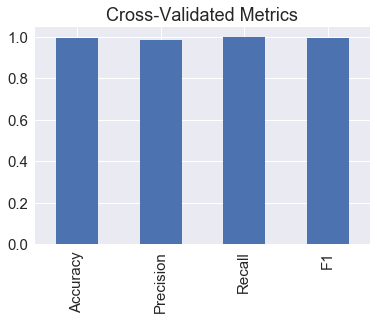

In [82]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

# Prediction

The prediction step is the last phase in the model process. After training and testing data we evaluated the model to choose the best one “Random Forest”. Now it’s time to predict the unseen data using our best classifier. The figure below shows the repartition of the unseen data. It can be seen that the majority will not donate. Since it did not take into account if the potential donors received ads in the previous campaigns it is difficult to conclude but it seems ineffective to send them the ads because with so low results they are very unlikely to donate. The persons that are predicted as potential donors will receive an ad to remind them to donate. 


## Recommendation

We suggest that instead of just sending a letter to our potential donors (donors whose model predicts that they will donate), we should schedule a call with them via email or text. We believe that encouraging donors to donate via a call would be much more effective than just sending them a letter as calling them would be more sincere and have a personal touch as well. Another way to get more donors would be raising funds via the internet through crowdfunding or advertisements on social media. The internet is a popular way of raising funds and awareness due to how fast news spread on the internet. This method would also allow the target age range to extend to the younger generation where currently donors are middle-age.


In [83]:
data_to_predict_df.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24
1,100002,2260.0,Antwerp,Flanders,M,NL,1952-01-14
2,100008,1780.0,Flemish Brabant,Flanders,M,NL,1937-08-30
3,100009,1020.0,Brussels,Brussels,M,NL,1932-01-20
4,100019,1030.0,Brussels,Brussels,M,NL,1971-01-16


In [84]:
predict_df = data_to_predict_df.copy()
predict_df['age'] = predict_df['dateOfBirth'].apply(calculate_age)
predict_df.drop(["donorID", "dateOfBirth"], axis=1, inplace= True)
predict_df.head()

,zipcode,province,region,gender,language,age
0,1861.0,Flemish Brabant,Flanders,F,NL,52
1,2260.0,Antwerp,Flanders,M,NL,68
2,1780.0,Flemish Brabant,Flanders,M,NL,82
3,1020.0,Brussels,Brussels,M,NL,88
4,1030.0,Brussels,Brussels,M,NL,49


In [85]:
labelencoder_X = LabelEncoder()
predict_df['gender'] = labelencoder_X.fit_transform(predict_df['gender'])
predict_df['language'] = labelencoder_X.fit_transform(predict_df['language'])

#dum_df = pd.get_dummies(df, columns=["province"], prefix=["province"] )
predict_df = pd.get_dummies(predict_df, columns=['province', "region"], prefix=['province',"region"] )
#predict_df.drop(['region_Missing', 'region_Missing'], axis=1, inplace= True)

In [86]:
predict_df.shape

(12823, 18)

In [87]:
from sklearn.ensemble import RandomForestClassifier

X = df_upsampled.drop("donated", axis=1)

# Target variable
y = df_upsampled.donated.values

X.drop(['region_Missing', 'province_Missing'], axis=1, inplace= True)


# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set


#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9924856634368202


In [88]:
X.columns

Index(['zipcode', 'gender', 'language', 'age', 'province_Antwerp',
       'province_Brussels', 'province_East Flanders',
       'province_Flemish Brabant', 'province_Hainaut', 'province_Liege',
       'province_Limburg', 'province_Luxembourg', 'province_Namur',
       'province_Walloon Brabant', 'province_West Flanders', 'region_Brussels',
       'region_Flanders', 'region_Wallonia'],
      dtype='object')

In [89]:
predict_df.columns

Index(['zipcode', 'gender', 'language', 'age', 'province_Antwerp',
       'province_Brussels', 'province_East Flanders',
       'province_Flemish Brabant', 'province_Hainaut', 'province_Liege',
       'province_Limburg', 'province_Luxembourg', 'province_Namur',
       'province_Walloon Brabant', 'province_West Flanders', 'region_Brussels',
       'region_Flanders', 'region_Wallonia'],
      dtype='object')

In [90]:
unseeen_data = clf.predict(predict_df)


In [91]:
donation_df = pd.DataFrame(unseeen_data, columns= ['donation'])
donation_df.donation.value_counts()

0    12654
1      169
Name: donation, dtype: int64

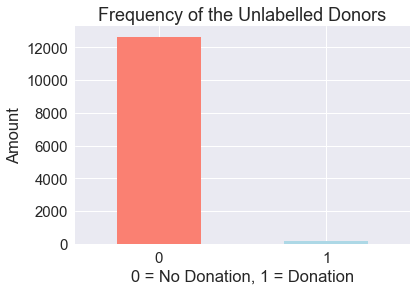

In [92]:
donation_df = pd.DataFrame(unseeen_data, columns= ['donation'])
# Plot the value counts with a bar graph
donation_df.donation.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.title("Frequency of the Unlabelled Donors")
plt.xlabel("0 = No Donation, 1 = Donation")
plt.ylabel("Amount")
#plt.legend()
plt.xticks(rotation=0); # keep the labels on the x-axis vertical
plt.savefig('fre_unlabelled_donors')


In [93]:
prdiction_file = pd.concat([data_to_predict_df['donorID'], donation_df], axis=1)
#prdiction_file = data_to_predict_df['donorID']+ donation_df['donation']
#columns = ['donorID', 'donation']
prdiction_file.head(5)


,donorID,donation
0,100001,0
1,100002,0
2,100008,0
3,100009,0
4,100019,0


In [94]:
prdiction_file

,donorID,donation
0,100001,0
1,100002,0
2,100008,0
3,100009,0
4,100019,0
...,...,...
12818,144678,0
12819,144681,0
12820,144682,0
12821,144686,0


# saving the file

In [ ]:
prdiction_file.to_csv('prediction_file.csv',index=False)

In [ ]:
#o_df = pd.read_csv('prediction_file.csv')